## Take Home Challenge - Ultimate Technologies inc.

In [33]:
import os
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

## Part 1 ‑ Exploratory data analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [34]:
#loading the JSON data
data_store = json.load(open('logins.json'))

In [35]:
#building the data frame
logins = json_normalize(data_store, record_path='login_time')

In [36]:
#name the first col "date"
logins.columns = ['date']

In [37]:
# create temp column with count of 1 per record
logins['temp'] = 1

In [38]:
# convert to true date timetampe
logins['date'] = pd.to_datetime(logins['date'])

In [39]:
#set index
logins.set_index('date', inplace=True)

In [40]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
temp    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [44]:
frequency_15 = logins.resample('15Min').count()

In [45]:
frequency_15.head()

,temp
date,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


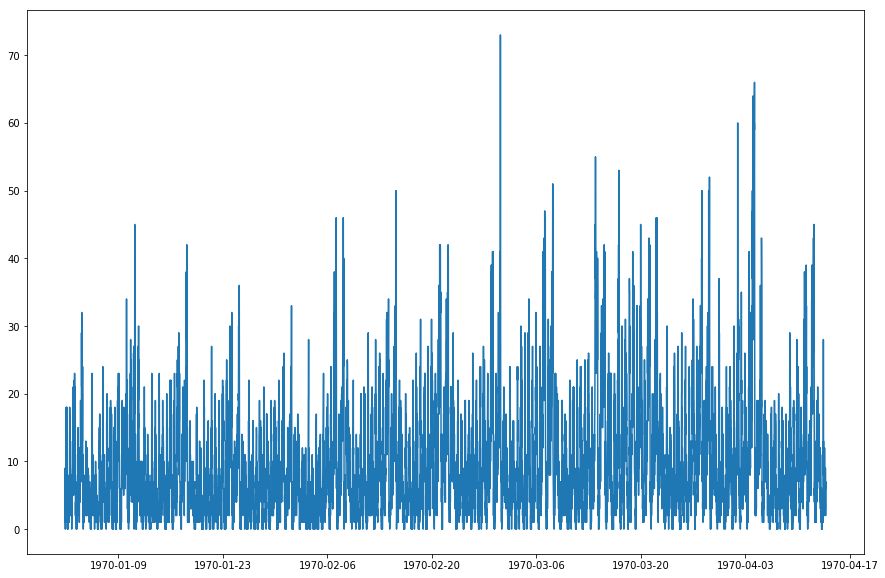

In [46]:
#plot frequency of 15 minutes
plt.plot(frequency_15['temp'])

In [47]:
# create the same thing at the daily level
frequency_D = logins.resample('D').count()

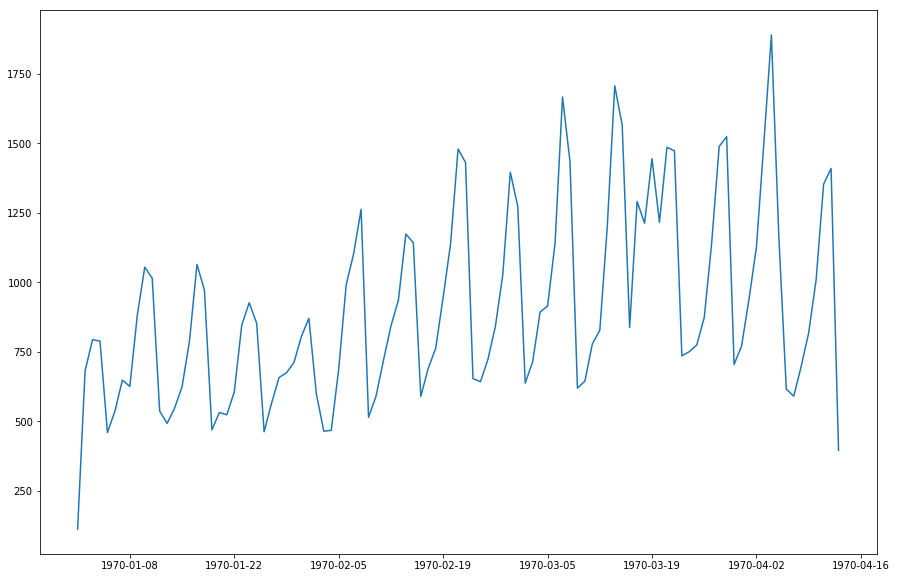

In [48]:
# plot frequency at the daily level
plt.plot(frequency_D['temp'])

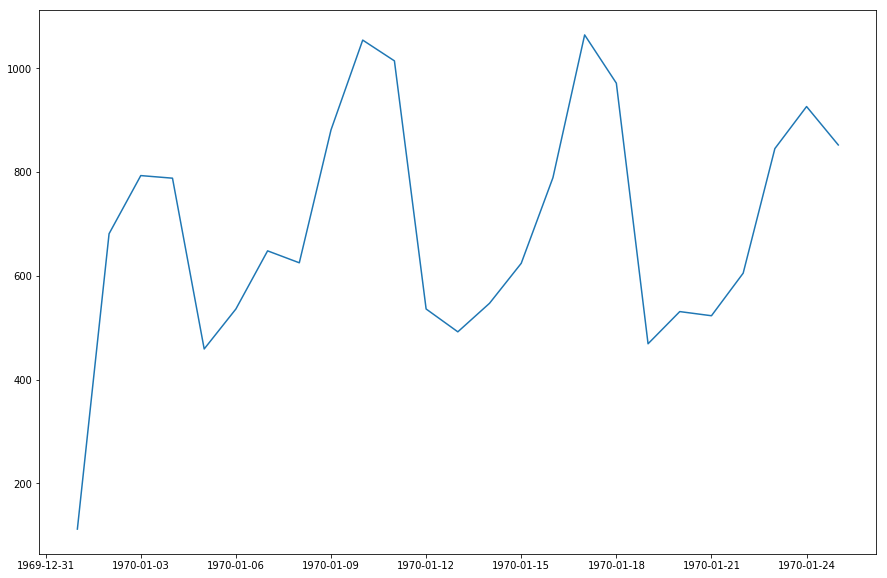

In [52]:
# plot frequency at the daily level
plt.plot(frequency_D['temp'][:25])

There is an increasing trend from January to April, looks to be a weekend trend as well with more users logging in on the weekends. 

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and p

## Pt 2 - Answer

If the toll operates every hour of every day, it is possible that commuting for work or friends/family are quite popular between the cities. It may be as simple as looking at the toll activity by license plate. It is very common for major metropolis areas to have a concentration of jobs adjacent to a concentration of housing. 

My key measure would be to look at the specific tolling activity by license plate to identify trends in usage.

An example experiment would be to look at sample data from usage. Our initial hypothesis would be that there would be a difference in driving patterns after the city decides to reimburse the tolls. We would use basic statistics to compute the appropriate measures (z stats, conf intervals, etc.) to reject or accept the initial hypothesis. 

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [54]:
#building the dataframe for retention analytics
temptable = json.load(open('ultimate_data_challenge.json'))
df_retention = pd.DataFrame(temptable)

In [55]:
df_retention['signup_date'] = pd.to_datetime(df_retention['signup_date'])

In [56]:
df_retention['last_trip_date'] = pd.to_datetime(df_retention['last_trip_date'])

In [57]:
df_retention.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [58]:
day1 = max(df_retention['last_trip_date'])

In [59]:
days = [day1 - datetime.timedelta(days=x) for x in range(0, 30)]

In [60]:
# build the retention column
df_retention['retention'] = df_retention['last_trip_date'].map(lambda x: int(x in days))

In [61]:
df_retention.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


## #3, pt 1 - retention

In [62]:
#finally, let's look at retention rate
ret_rate = len(df_retention[df_retention['retention'] == 1])/len(df_retention)
print(ret_rate)

0.3662


So only 36.62% are retained, not sure if that is good or not.

## Building the predictive model (# 3, pt 2)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [70]:
df_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retention                 50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [72]:
# fill null values
df_retention['avg_rating_by_driver'].fillna(df_retention['avg_rating_by_driver'].mean(), inplace=True)
df_retention['avg_rating_of_driver'].fillna(df_retention['avg_rating_of_driver'].mean(), inplace=True)
df_retention['phone'].fillna('Unknown', inplace=True)

In [75]:
df_retention.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [76]:
df_retention.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'retention'],
      dtype='object')

In [79]:
df_retention_final = df_retention[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
                                   'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'retention']]

In [80]:
df_retention_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention
0,3.67,5.0,4.7,4,True,46.2,1
1,8.26,5.0,5.0,0,False,50.0,0
2,0.77,5.0,4.3,3,False,100.0,0
3,2.36,4.9,4.6,9,True,80.0,1
4,3.13,4.9,4.4,14,False,82.4,0


In [93]:
# define the ML inputs 
x = df_retention_final.drop(['retention'], axis=1)
y = df_retention_final['retention']

In [96]:
# build a simple model based on the various features selected
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [99]:
# print the relevant score and conf matrix
print(accuracy_score(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

0.6824

[[4327  417]
 [1965  791]]


The model is 68% accurate. Based on the confusion matrix we see decent performance with the model with few false positives (401/4753)

I would say that the selected features help predict retention: avg ratings, distance, and the others built in the model appear to have a direct correlation with retention. This is intuitive in the sense that ratings relate to customer experience and distances and loyal member programs will drive user retention. 